# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

ANSWER: The pros of the histogram is that it shows us the shape of the data and tells us if the data is skewed a certain way. A con to the histogram is that it is harder to spot outliers and the wrong bin size could affect the interpretation. 

The pros of the box plot is that it clearly shows median, quartiles, outliers and spread. The con is that it doesn't show the full distribution of the data, and could be confusing to certain audiences. 

I would choose the boxplot becuase it clearly shows differences in drug prices and you can pinpoint outliers. 


In [2]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

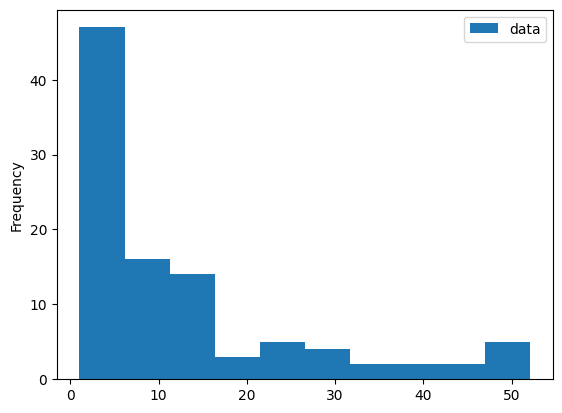

In [3]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

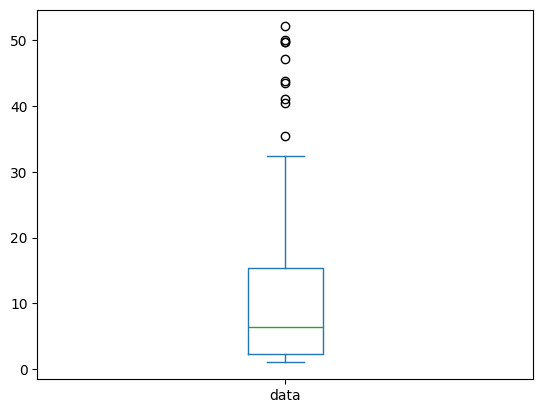

In [4]:
df.plot.box()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [17]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

#only one dataset is shown, but I will do all 3 datasets for the final project

/tmp/ipykernel_6846/1884618413.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15, 4))


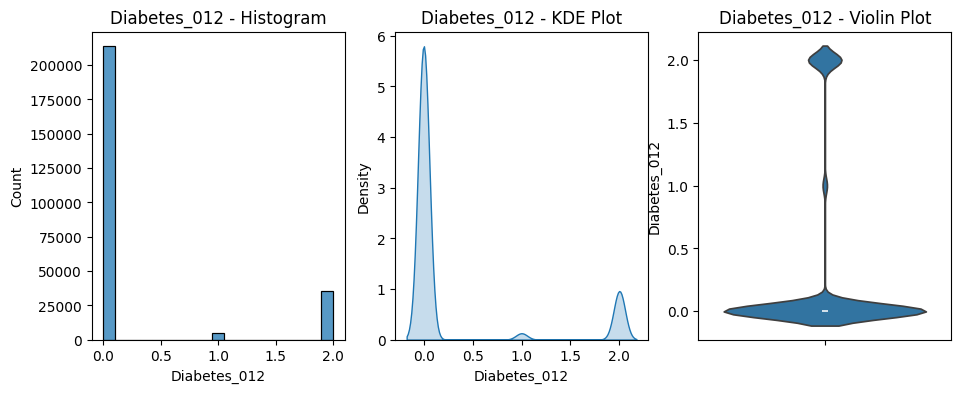

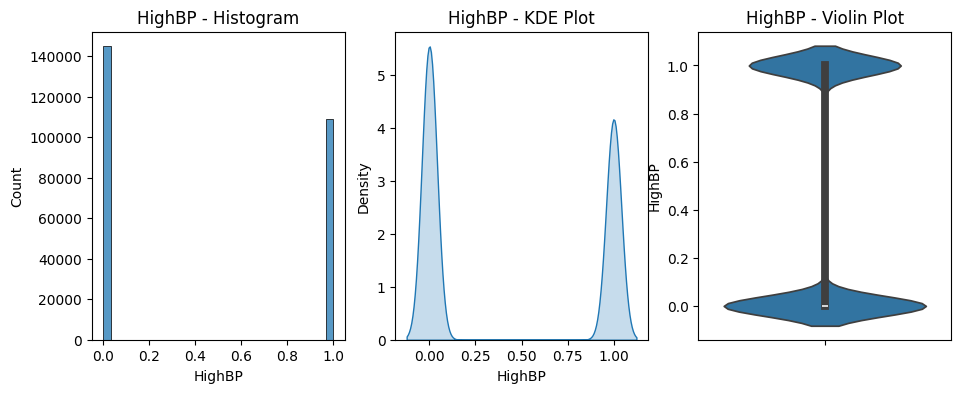

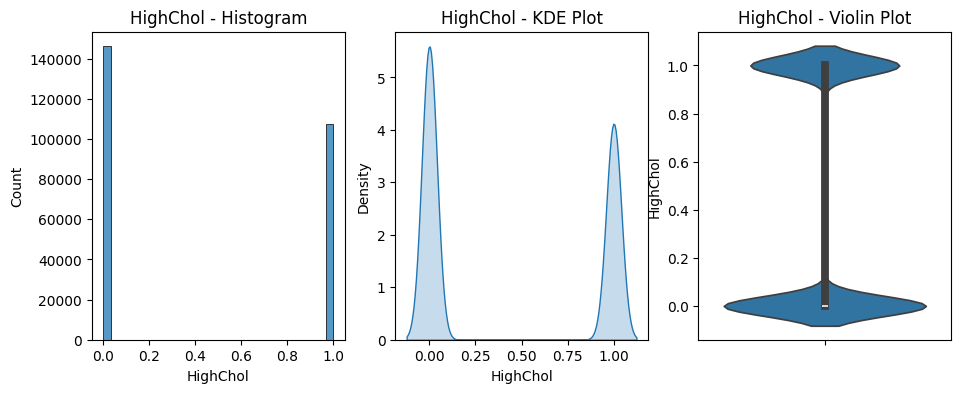

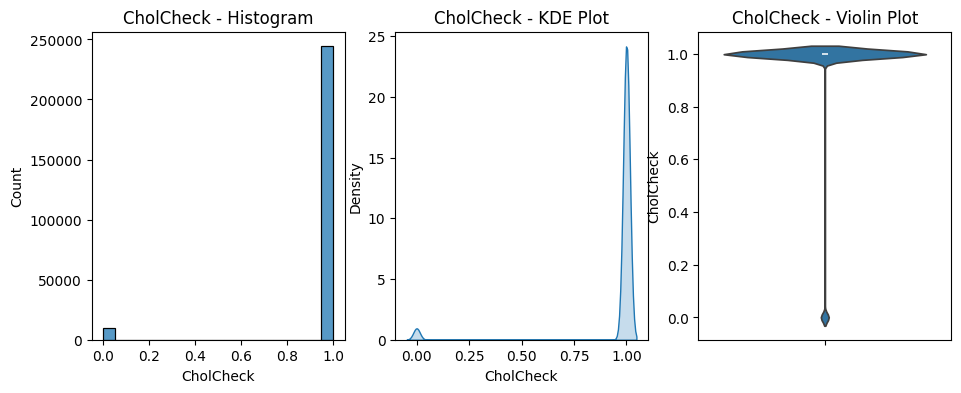

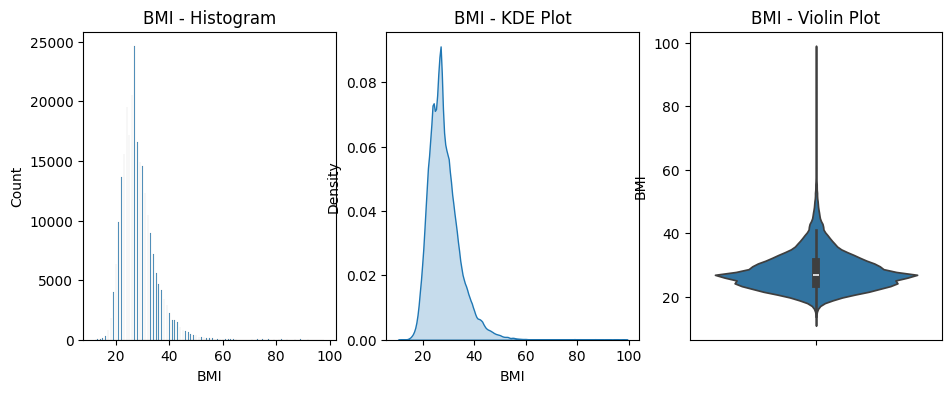

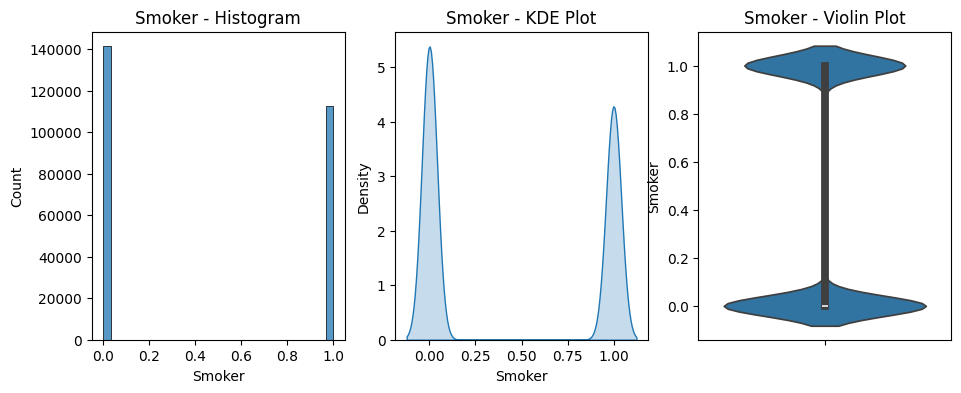

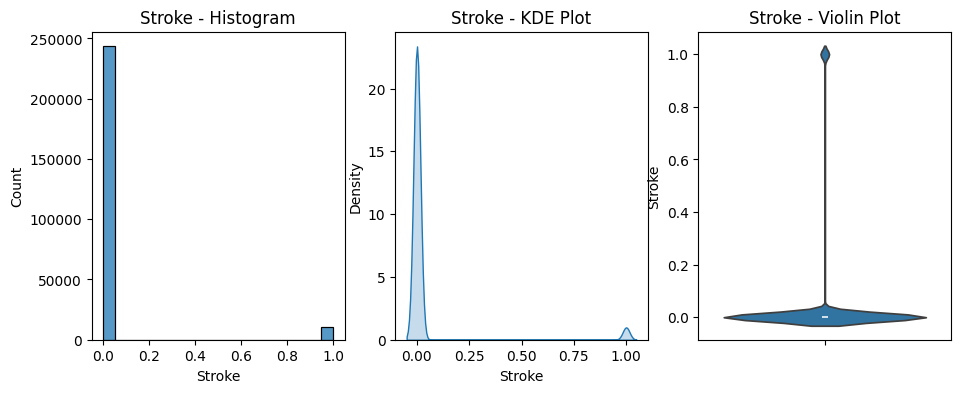

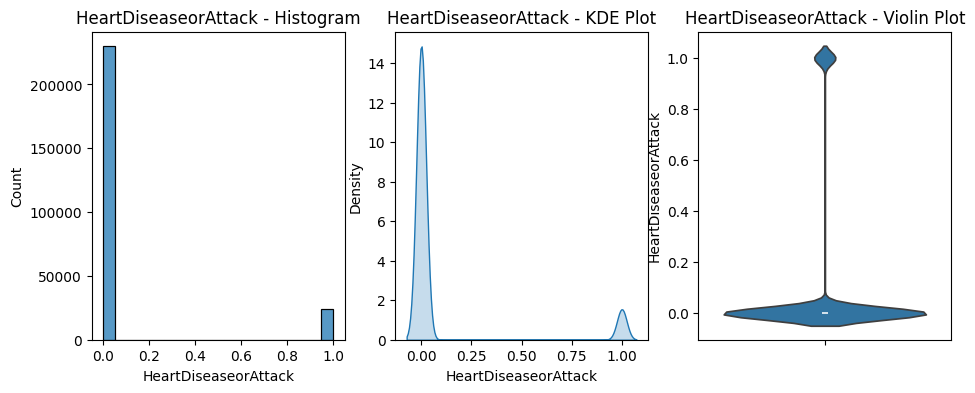

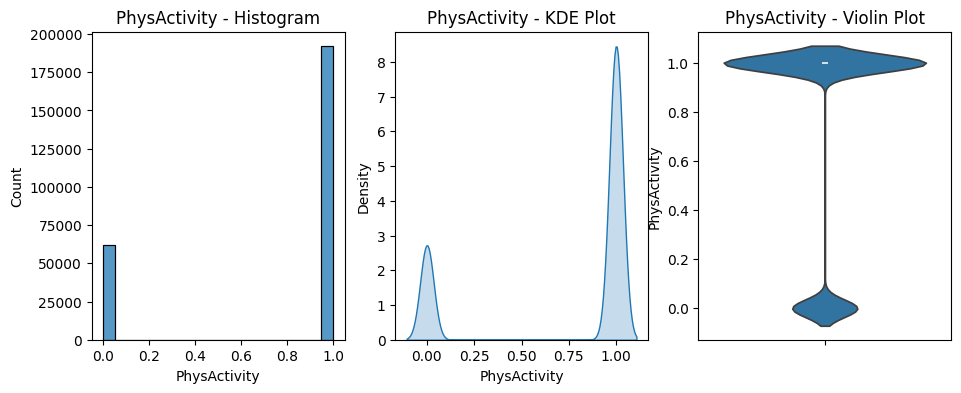

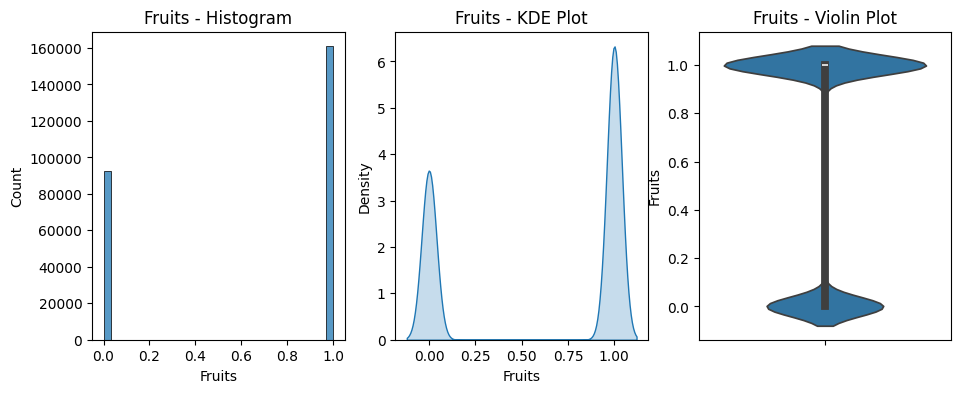

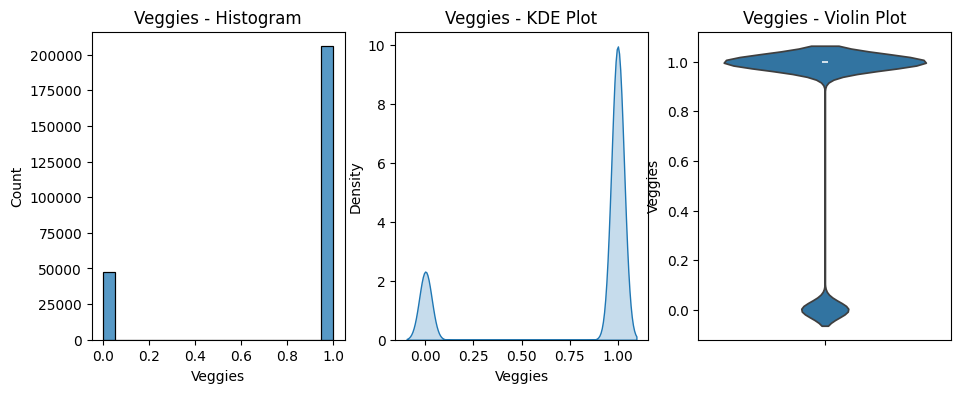

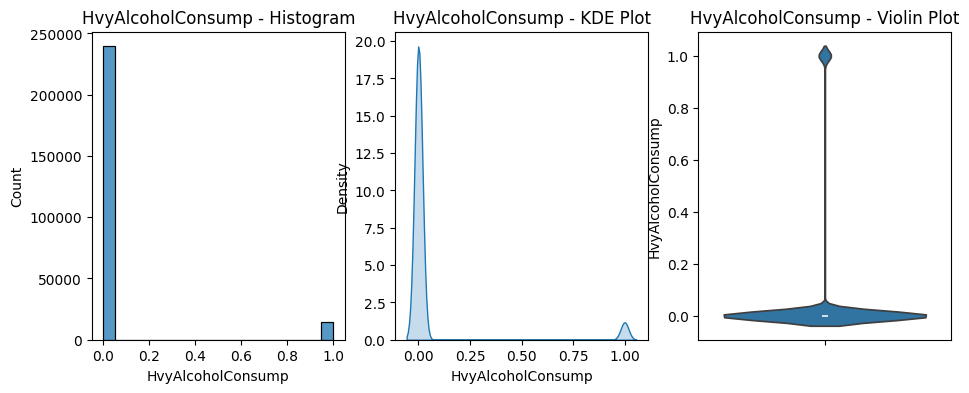

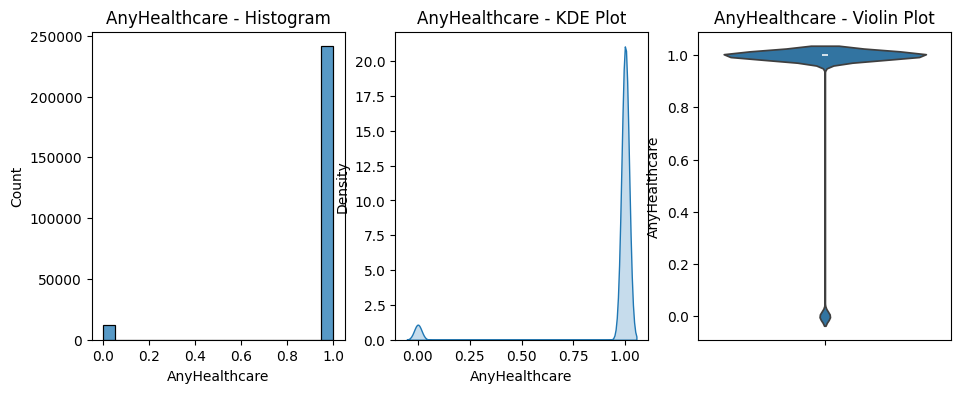

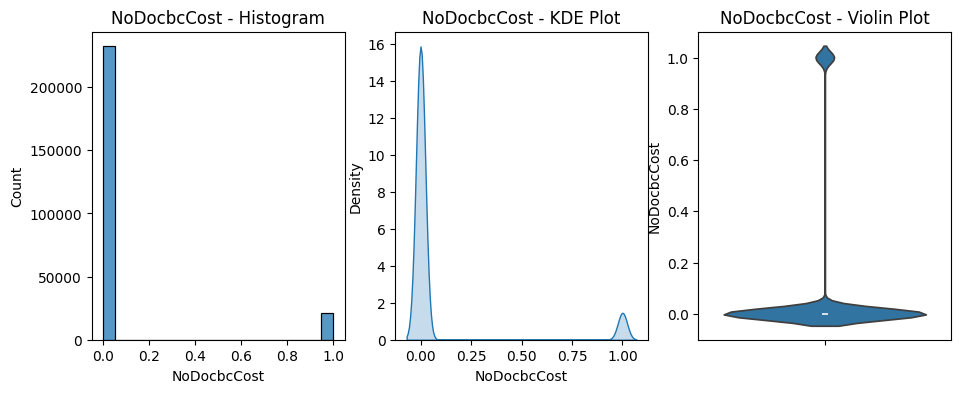

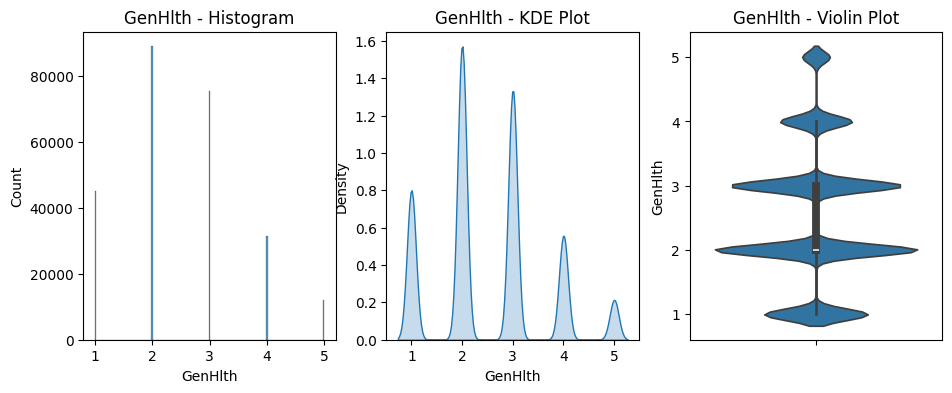

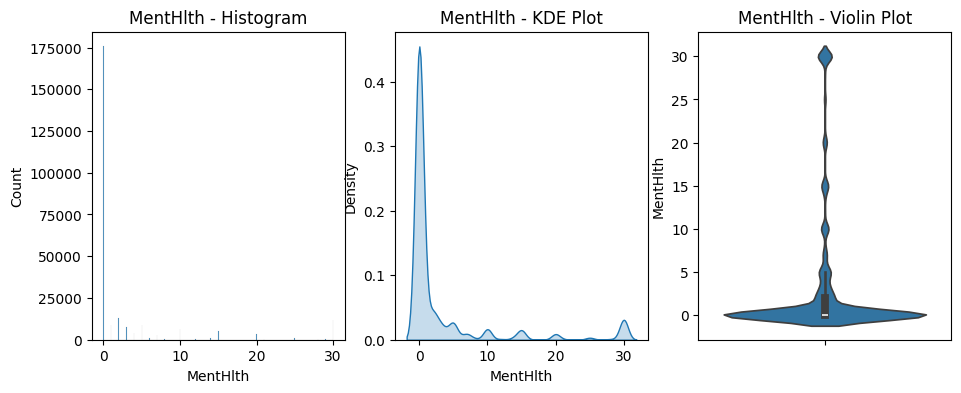

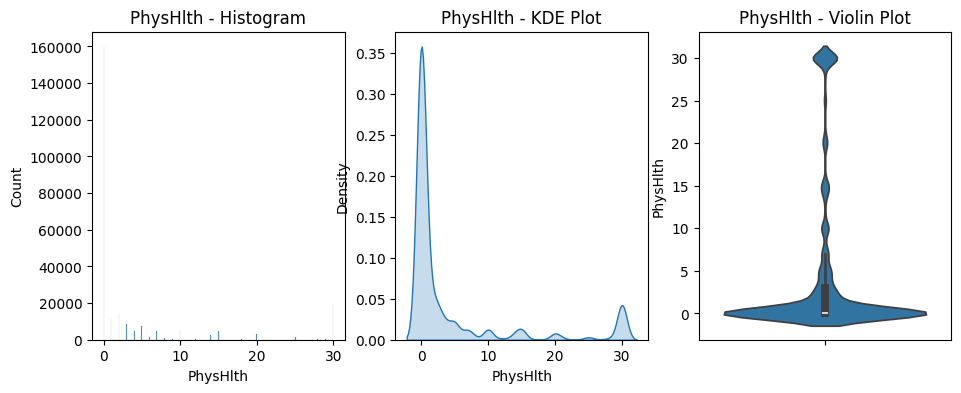

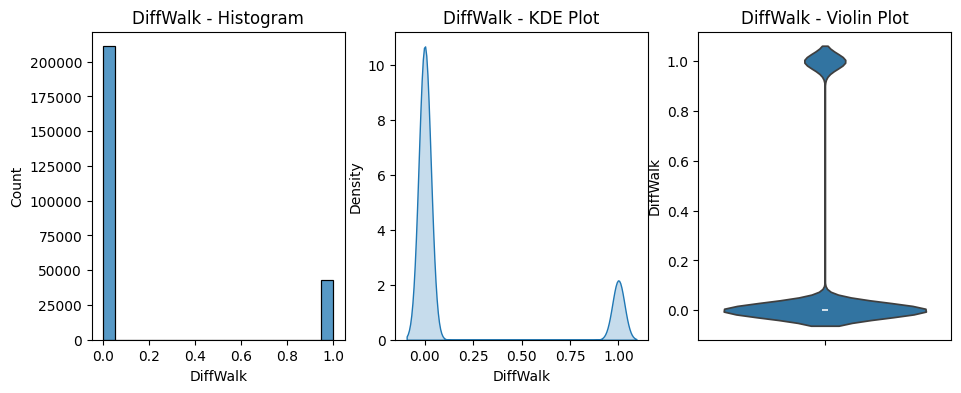

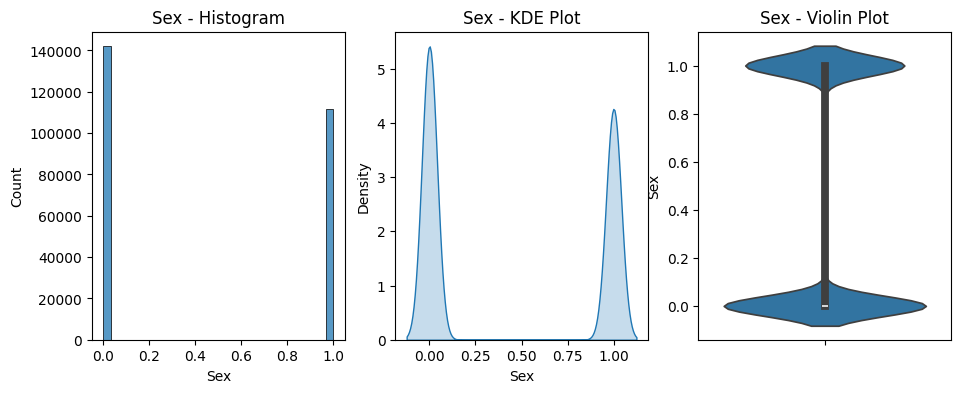

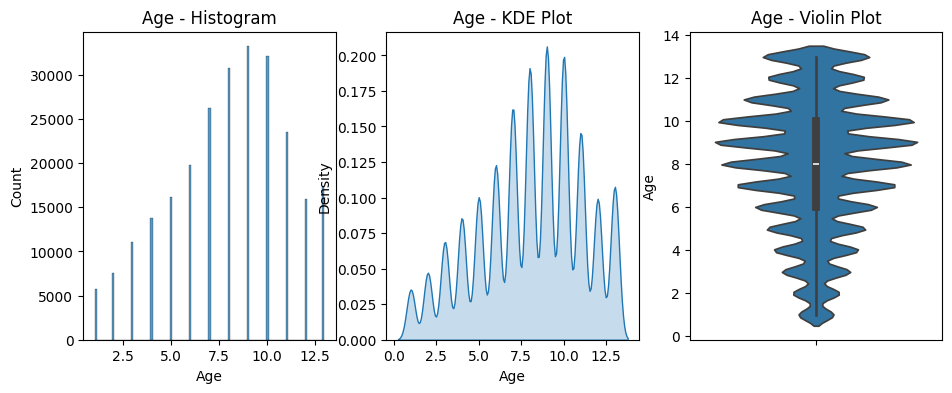

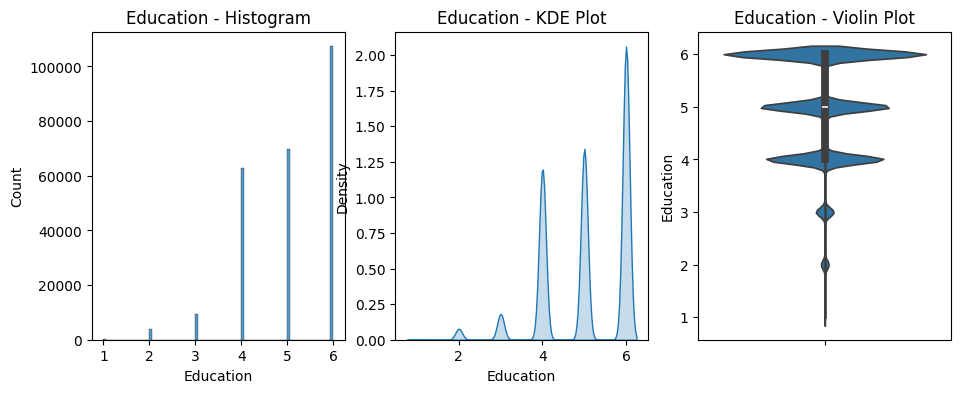

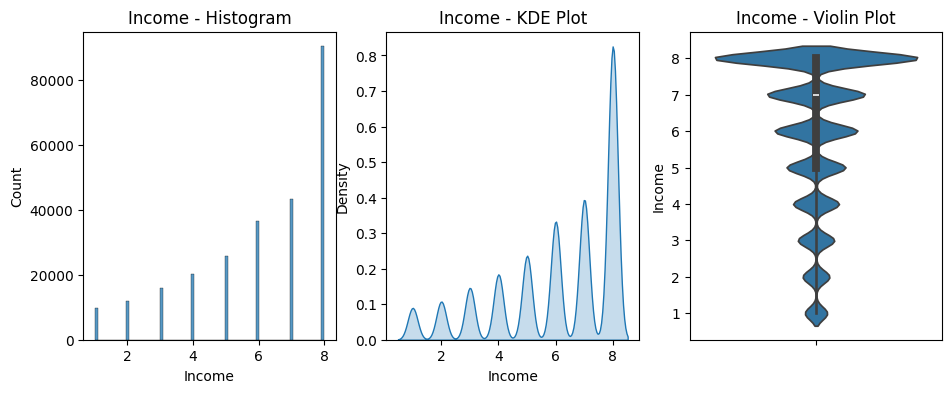

In [9]:
# Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).
for col in df.columns:
    plt.figure(figsize=(15, 4))

    # Histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[col], kde=False)
    plt.title(f'{col} - Histogram')

    # KDE Plot
    plt.subplot(1, 4, 2)
    sns.kdeplot(df[col], fill=True)
    plt.title(f'{col} - KDE Plot')

    # Violin Plot
    plt.subplot(1, 4, 3)
    sns.violinplot(y=df[col])
    plt.title(f'{col} - Violin Plot')

/tmp/ipykernel_6846/1976591714.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Diabetes Status")


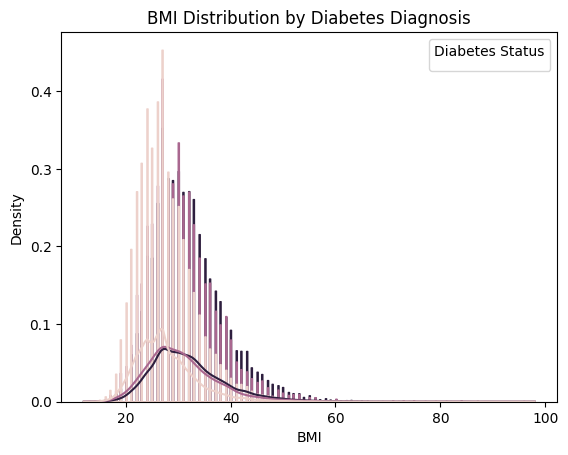

In [11]:
#Draw grouped histograms

sns.histplot(data=df, x='BMI', hue='Diabetes_012', kde=True, element='step', stat='density', common_norm=False)
plt.title("BMI Distribution by Diabetes Diagnosis")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.legend(title="Diabetes Status")
plt.show()

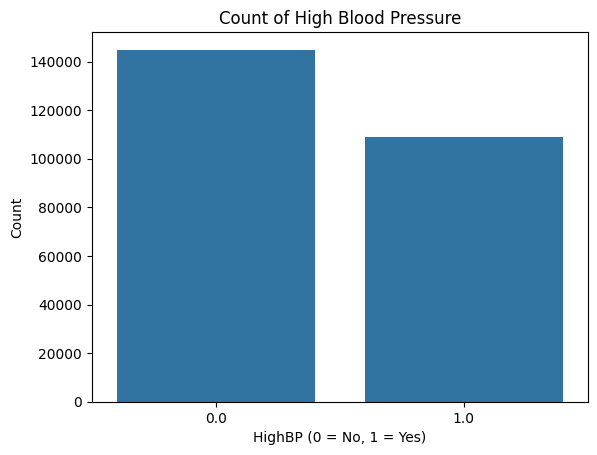

In [12]:
#Draw a bar plot to indicate total counts of each categorical variable in a given column
sns.countplot(x='HighBP', data=df)
plt.title("Count of High Blood Pressure")
plt.xlabel("HighBP (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [14]:
#Find means, medians, and modes
mean_media_mode_table = pd.DataFrame({
    "Mean": df.mean(),
    "Median": df.median(),
    "Mode": df.mode().iloc[0]
})
print(mean_media_mode_table)

                           Mean  Median  Mode
Diabetes_012           0.296921     0.0   0.0
HighBP                 0.429001     0.0   0.0
HighChol               0.424121     0.0   0.0
CholCheck              0.962670     1.0   1.0
BMI                   28.382364    27.0  27.0
Smoker                 0.443169     0.0   0.0
Stroke                 0.040571     0.0   0.0
HeartDiseaseorAttack   0.094186     0.0   0.0
PhysActivity           0.756544     1.0   1.0
Fruits                 0.634256     1.0   1.0
Veggies                0.811420     1.0   1.0
HvyAlcoholConsump      0.056197     0.0   0.0
AnyHealthcare          0.951053     1.0   1.0
NoDocbcCost            0.084177     0.0   0.0
GenHlth                2.511392     2.0   2.0
MentHlth               3.184772     0.0   0.0
PhysHlth               4.242081     0.0   0.0
DiffWalk               0.168224     0.0   0.0
Sex                    0.440342     0.0   0.0
Age                    8.032119     8.0   9.0
Education              5.050434   

In [15]:
min_max_table = pd.DataFrame({
    "Min": df.min(),
    "Max": df.max()
})
print(min_max_table)

                       Min   Max
Diabetes_012           0.0   2.0
HighBP                 0.0   1.0
HighChol               0.0   1.0
CholCheck              0.0   1.0
BMI                   12.0  98.0
Smoker                 0.0   1.0
Stroke                 0.0   1.0
HeartDiseaseorAttack   0.0   1.0
PhysActivity           0.0   1.0
Fruits                 0.0   1.0
Veggies                0.0   1.0
HvyAlcoholConsump      0.0   1.0
AnyHealthcare          0.0   1.0
NoDocbcCost            0.0   1.0
GenHlth                1.0   5.0
MentHlth               0.0  30.0
PhysHlth               0.0  30.0
DiffWalk               0.0   1.0
Sex                    0.0   1.0
Age                    1.0  13.0
Education              1.0   6.0
Income                 1.0   8.0



Conclusions

1) Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!
- The data is what I would expect. With health data, there is always a lot of variation due to human nature, but with a lot of datapoints there are clear trends in the data. For example most people are in the mid-BMI range with some really high and some really low. 
- The data is useable. 


2) What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?
- Education and income are left skewed while BMI is right skewed. The rest are 0/1 binary so there is no normal distribution.


3) Are there any outliers present?  (Data points that are far from the others.)
- There are outliers in the BMI column. The columns with binary answers do not have outliers since there are only two categories. 


4) If there are multiple related histograms, how does the distribution change across different groups?
- When grouping by Diabetes, BMI or HighBP shift higher in those with diabetes as expected.


5) What are the minimum and maximum values represented in each histogram?
- see table above


6) How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?
- Too few bins showes more detail but looks noisy, while many bins smooths out the distribution but might be hiding trends and outliers.  


7) Does the distribution appear normal, or does it have a different distribution?
- Normal but skewed right or left as described above. 

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

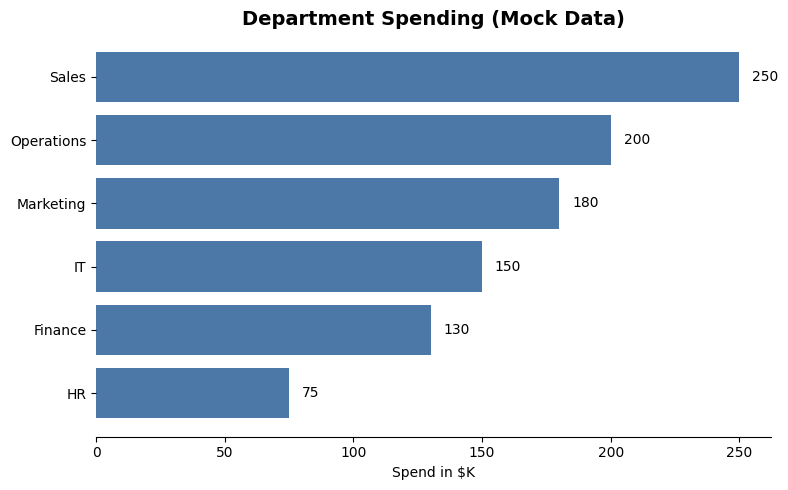

In [16]:
# Simulation data
data = {
    'Department': ['Sales', 'Marketing', 'HR', 'IT', 'Finance', 'Operations'],
    'Spend': [250, 180, 75, 150, 130, 200]
}

df = pd.DataFrame(data).sort_values('Spend', ascending=True)

# Plot
plt.figure(figsize=(8, 5))
bars = plt.barh(df['Department'], df['Spend'], color='#4C78A8')

# Remove spines and gridlines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(False)

# Add bar labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f'{width}', va='center')

# Titles and labels
plt.title("Department Spending (Mock Data)", fontsize=14, weight='bold')
plt.xlabel("Spend in $K")
plt.tight_layout()
plt.show()